In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [6]:
df=pd.read_csv('market-price.csv')
df

,Timestamp,market-price
0,2021-07-04 00:00:00,34688.98
1,2021-07-05 00:00:00,35309.30
2,2021-07-06 00:00:00,33747.97
3,2021-07-07 00:00:00,34211.01
4,2021-07-08 00:00:00,33839.04
...,...,...
361,2022-06-30 00:00:00,20085.93
362,2022-07-01 00:00:00,19865.70
363,2022-07-02 00:00:00,19226.70
364,2022-07-03 00:00:00,19224.75


In [7]:
df.describe()

,market-price
count,366.000000
mean,42816.205273
std,10572.581989
min,18977.510000
25%,37106.012500
50%,42505.420000
75%,48246.017500
max,67562.170000


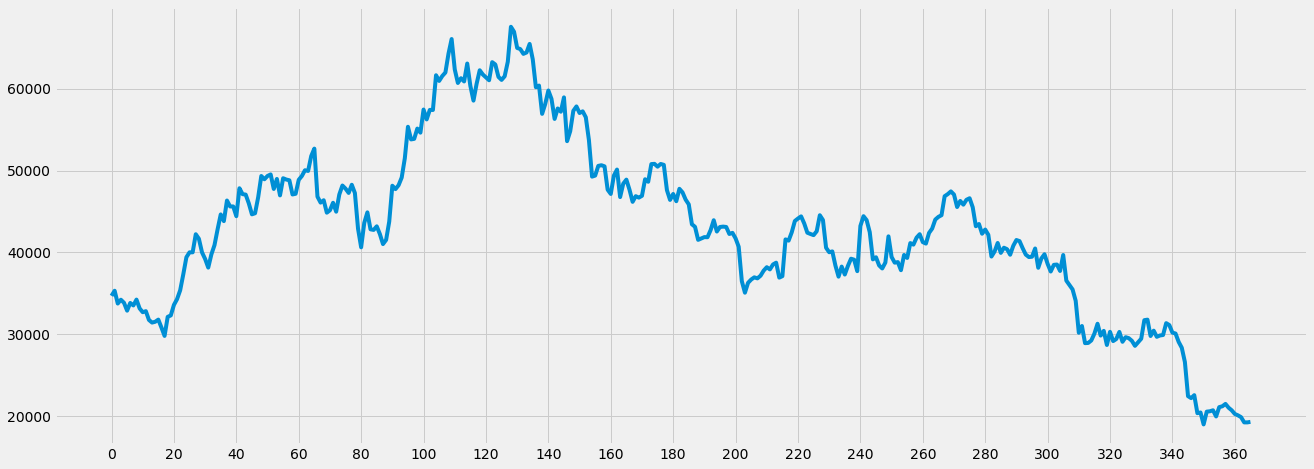

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,7.5))

plt.plot(df['market-price'])
#plt.gca().invert_xaxis()
plt.xticks(range(0,365,20))
plt.show()

In [9]:
days=int(input())

30


In [10]:
sh=0
for i in range(1,days+1):
    df['x'+str(i)]=df['market-price'].shift(i+sh)
df.head(days+sh+1)

,Timestamp,market-price,x1,x2,x3,x4,x5,x6,x7,x8,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,2021-07-04 00:00:00,34688.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-05 00:00:00,35309.30,34688.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-06 00:00:00,33747.97,35309.30,34688.98,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-07 00:00:00,34211.01,33747.97,35309.30,34688.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-08 00:00:00,33839.04,34211.01,33747.97,35309.30,34688.98,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-07-09 00:00:00,32877.41,33839.04,34211.01,33747.97,35309.30,34688.98,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-07-10 00:00:00,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30,34688.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-07-11 00:00:00,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30,34688.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-07-12 00:00:00,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30,34688.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-07-13 00:00:00,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail(1)

,Timestamp,market-price,x1,x2,x3,x4,x5,x6,x7,x8,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
365,2022-07-04 00:00:00,19288.97,19224.75,19226.7,19865.7,20085.93,20256.61,20702.23,21020.04,21481.38,...,26593.3,28344.5,29059.41,30083.46,30189.25,31117.83,31349.82,29901.35,29845.23,29681.76


In [12]:
x=df[['x'+str(j) for j in range(1,days+1)]]
y=df['market-price']

In [13]:
x=x.iloc[days+sh:]
y=y.iloc[days+sh:]

In [14]:
x.head(days+sh+1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
30,40000.46,41659.06,42214.15,40005.93,40002.53,39405.95,37318.14,35365.20,34279.34,33581.63,...,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30,34688.98
31,39193.94,40000.46,41659.06,42214.15,40005.93,40002.53,39405.95,37318.14,35365.20,34279.34,...,32686.56,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97,35309.30
32,38138.00,39193.94,40000.46,41659.06,42214.15,40005.93,40002.53,39405.95,37318.14,35365.20,...,32814.61,32686.56,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01,33747.97
33,39750.14,38138.00,39193.94,40000.46,41659.06,42214.15,40005.93,40002.53,39405.95,37318.14,...,31738.59,32814.61,32686.56,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04,34211.01
34,40882.00,39750.14,38138.00,39193.94,40000.46,41659.06,42214.15,40005.93,40002.53,39405.95,...,31421.25,31738.59,32814.61,32686.56,33158.25,34227.64,33515.57,33818.52,32877.41,33839.04
35,42825.95,40882.00,39750.14,38138.00,39193.94,40000.46,41659.06,42214.15,40005.93,40002.53,...,31520.66,31421.25,31738.59,32814.61,32686.56,33158.25,34227.64,33515.57,33818.52,32877.41
36,44634.13,42825.95,40882.00,39750.14,38138.00,39193.94,40000.46,41659.06,42214.15,40005.93,...,31783.49,31520.66,31421.25,31738.59,32814.61,32686.56,33158.25,34227.64,33515.57,33818.52
37,43816.14,44634.13,42825.95,40882.00,39750.14,38138.00,39193.94,40000.46,41659.06,42214.15,...,30815.94,31783.49,31520.66,31421.25,31738.59,32814.61,32686.56,33158.25,34227.64,33515.57
38,46333.46,43816.14,44634.13,42825.95,40882.00,39750.14,38138.00,39193.94,40000.46,41659.06,...,29790.24,30815.94,31783.49,31520.66,31421.25,31738.59,32814.61,32686.56,33158.25,34227.64
39,45608.37,46333.46,43816.14,44634.13,42825.95,40882.00,39750.14,38138.00,39193.94,40000.46,...,32118.06,29790.24,30815.94,31783.49,31520.66,31421.25,31738.59,32814.61,32686.56,33158.25


In [15]:
xscaler=MinMaxScaler(feature_range=(0,1))
xscaler.fit(x)

MinMaxScaler()

In [16]:
x=xscaler.transform(x)

In [17]:
x[0]

array([0.43270757, 0.46684591, 0.47827113, 0.43282015, 0.43275017,
       0.42047099, 0.37749837, 0.33730173, 0.31495188, 0.30059117,
       0.27416843, 0.27046706, 0.2225544 , 0.243666  , 0.26358073,
       0.23659776, 0.23449214, 0.21046273, 0.23417777, 0.22723519,
       0.1602424 , 0.15001248, 0.12663583, 0.13440711, 0.11026573,
       0.13493349, 0.14447527, 0.13259736, 0.17264863, 0.15673617])

In [18]:
y=y.to_numpy()

In [19]:
y=y.reshape(366-days,1)

In [20]:
y.shape

(336, 1)

In [21]:
yscaler=MinMaxScaler(feature_range=(0,1))
yscaler.fit(y)

MinMaxScaler()

In [22]:
y=yscaler.transform(y)

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.1,shuffle=False)

In [24]:
xtrain

array([[0.43270757, 0.46684591, 0.47827113, ..., 0.13259736, 0.17264863,
        0.15673617],
       [0.41610727, 0.43270757, 0.46684591, ..., 0.14447527, 0.13259736,
        0.17264863],
       [0.39437324, 0.41610727, 0.43270757, ..., 0.13493349, 0.14447527,
        0.13259736],
       ...,
       [0.19762164, 0.21028057, 0.21696313, ..., 0.23297937, 0.25696632,
        0.28707564],
       [0.20657096, 0.19762164, 0.21028057, ..., 0.25386756, 0.23297937,
        0.25696632],
       [0.21552544, 0.20657096, 0.19762164, ..., 0.25476974, 0.25386756,
        0.23297937]])

In [25]:
ntest=xtest.shape[0]
ntest

34

In [26]:
ntrain=xtrain.shape[0]
ntrain

302

In [27]:
#xtrain=xtrain.to_numpy()
#xtest=xtest.to_numpy()

In [28]:
xtrain=xtrain.reshape(ntrain,days,1)
xtest=xtest.reshape(ntest,days,1)

In [29]:
print(xtrain.shape,'\t',xtest.shape)

(302, 30, 1) 	 (34, 30, 1)


In [30]:
model=Sequential()

#model.add(LSTM(128,return_sequences=True,input_shape=(1,days)))
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(days,1))))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
#model.add(Dropout(0.2))
#model.add(LSTM(128,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128,return_sequences=True))
#model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())

model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

#model.summary()

In [31]:
output_dir = 'model_output/LSTM'
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [32]:
model.fit(xtrain,ytrain,batch_size=2,epochs=30,validation_data=(xtest,ytest),callbacks=[modelcheckpoint])

Epoch 1/30
151/151 [==============================] - 8s 26ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2/30
151/151 [==============================] - 3s 17ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 3/30
151/151 [==============================] - 3s 17ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 4/30
151/151 [==============================] - 3s 17ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 5/30
151/151 [==============================] - 3s 17ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/30
151/151 [==============================] - 3s 18ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 7/30
151/151 [==

In [42]:
model.load_weights(output_dir+"/weights.25.hdf5")

In [43]:
mypr=model.predict(xtest)
mypr=mypr.reshape(ntest,)

2/2 [==============================] - 0s 6ms/step


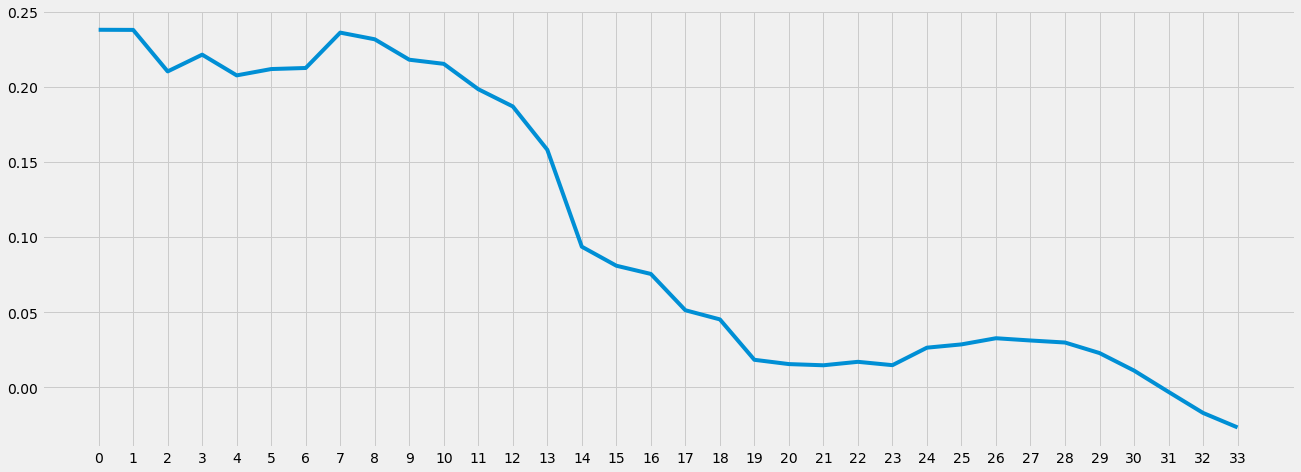

In [44]:
plt.figure(figsize=(20,7.5))

plt.plot(mypr)
#plt.gca().invert_xaxis()
#plt.yticks([0.8,1.2])
plt.xticks(ticks=range(ntest))
plt.style.use('fivethirtyeight')
plt.show()

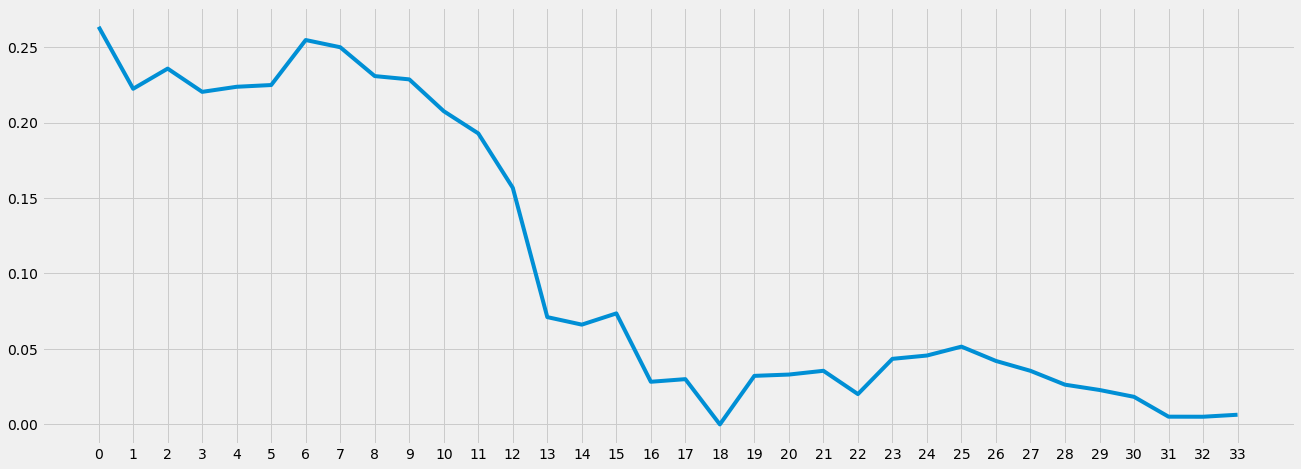

In [45]:
plt.figure(figsize=(20,7.5))

plt.plot(ytest)
#plt.gca().invert_xaxis()
#plt.yticks([0.099,1.009])
#plt.xticks(range(ntrain+days+sh,ntrain+days+ntest+sh+1))
plt.xticks(range(ntest))
plt.style.use('fivethirtyeight')
plt.show()

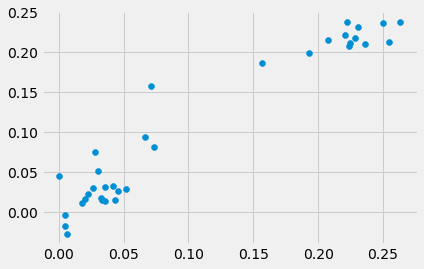

In [46]:
#plt.figure(figsize=(4,4))
plt.scatter(ytest,mypr)
#plt.xticks(range(0,1,0.25))
#plt.yticks(range(0,1,0.25))
plt.show()

In [47]:
mypr[0:5],ytest[:5]

(array([0.23799911, 0.23792318, 0.21027592, 0.22142506, 0.20763364],
       dtype=float32),
 array([[0.26343212],
        [0.22236031],
        [0.23571988],
        [0.2203216 ],
        [0.22368624]]))

In [48]:
allpr=model.predict(xtrain)
allpr=allpr.reshape(ntrain,)
allpr

10/10 [==============================] - 0s 14ms/step


array([0.41213033, 0.39725748, 0.37629423, 0.4038635 , 0.42190218,
       0.45862702, 0.4910123 , 0.4793292 , 0.5282394 , 0.5132582 ,
       0.5196144 , 0.49714464, 0.5600673 , 0.54160005, 0.5479144 ,
       0.5262654 , 0.5035676 , 0.5036901 , 0.5370922 , 0.58176225,
       0.5751617 , 0.5879282 , 0.5908059 , 0.5595604 , 0.5847905 ,
       0.54242295, 0.5859733 , 0.575796  , 0.5792345 , 0.54563296,
       0.5491525 , 0.57702   , 0.58409095, 0.5994095 , 0.59724534,
       0.6336025 , 0.64802444, 0.5418585 , 0.53501964, 0.5292501 ,
       0.5002692 , 0.5060406 , 0.52024156, 0.50048417, 0.54273146,
       0.55964875, 0.5553076 , 0.5469889 , 0.5657057 , 0.54497814,
       0.468465  , 0.42912677, 0.47708592, 0.49549225, 0.4612148 ,
       0.46235776, 0.4672797 , 0.45040527, 0.42958644, 0.43788418,
       0.47649392, 0.55687803, 0.54814285, 0.56516474, 0.58118594,
       0.627897  , 0.7010534 , 0.67042816, 0.6818392 , 0.7014862 ,
       0.6911756 , 0.74863416, 0.7182433 , 0.74913293, 0.74154

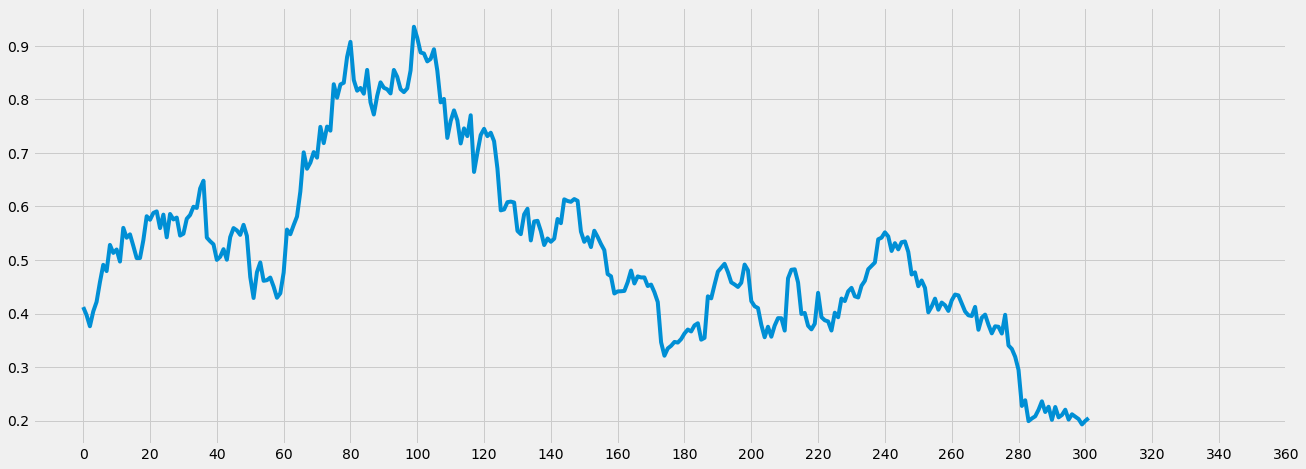

In [49]:
plt.figure(figsize=(20,7.5))

plt.plot(allpr)
#plt.gca().invert_xaxis()
plt.xticks(range(0,365,20))
plt.style.use('fivethirtyeight')
plt.show()

In [50]:
len(allpr)

302